# Data-driven persona creation Q1 2021
The below code is inspired by the process in iteration 1 and consist of the same algorithm as in 1.ddp-Q1.ipynb file. The differences would be in the dataset time frame and the csv files produced.

In [1]:
# Remove the warnings for presentation of the notebook. During the development, the warnings were not ignored.
import warnings
warnings.filterwarnings('ignore')

First, import numpy, pandas, and datetime libraries, then read the Q4 dummy dataset.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('iteration-2-Q1.csv')
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,activity,page
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,Event,https://en.wikipedia.org/wiki/Financial_services
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,Event,https://en.wikipedia.org/wiki/Financial_services
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,Page,https://en.wikipedia.org/wiki/Financial_services
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,Event,https://en.wikipedia.org/wiki/Financial_techno...
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,Event,https://en.wikipedia.org/wiki/Accounting


Then, calculate count of activity (rows) in the dataset, count of unique user and the variable names to be inserted in 'The Process' section of the dashboard.

In [3]:
activityCount = df.shape[0]
userCount = df['userID'].nunique()
variableNames = df.columns.values
variableNames = list(variableNames)

In [4]:
df['userID'] = df['userID'].astype(str)
df['page'] = df['page'].astype(str)

Further, the acitivy column is processed into dummy because the next few data transformation will be specific for user activity with the value event.

In [5]:
df['activity_og'] = df['activity'].copy()
df = pd.get_dummies(df, columns=['activity'])
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,activity_og,activity_Event,activity_Page
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,https://en.wikipedia.org/wiki/Financial_services,Page,0,1
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,https://en.wikipedia.org/wiki/Financial_techno...,Event,1,0
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,https://en.wikipedia.org/wiki/Accounting,Event,1,0


With mapping function, the below cell count the amount of user per company. So the userID per company was grouped then transformed into the count number of the user. Then by matching the companyID, the user count per company is pushed back to a new column in dataframe named companySize.

In [6]:
userCountPerCompany = df[['companyID', 'userID']]
userCountPerCompany['companySize'] = userCountPerCompany.groupby(by='companyID')['userID'].transform('count')
mapping = dict(userCountPerCompany[['companyID', 'companySize']].values)
df['companySize'] = df.companyID.map(mapping)
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,activity_og,activity_Event,activity_Page,companySize
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,2466
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,3075
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,https://en.wikipedia.org/wiki/Financial_services,Page,0,1,1027
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,https://en.wikipedia.org/wiki/Financial_techno...,Event,1,0,2040
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,https://en.wikipedia.org/wiki/Accounting,Event,1,0,1487


Then, take the some more time variables from timestamp, such as hour, day of week and week of year. The timestamp is first updated into the local timestamp, since the timestamp is local European time where the analytic dashboard is set up.

In [7]:
import datetime as dt
import pytz

localIndTime = df[['country', 'timestamp']]
localIndTime = df[df['country'] == 'Indonesia']
localIndTime['visitTimeLocal'] = pd.to_datetime(localIndTime['timestamp'])
localIndTime['visitTimeLocal'] = localIndTime['visitTimeLocal'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
mapping5 = dict(localIndTime[['timestamp', 'visitTimeLocal']].values)
df['visitTimeLocal'] = df[df['country'] == 'Indonesia'].timestamp.map(mapping5)
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,activity_og,activity_Event,activity_Page,companySize,visitTimeLocal
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,2466,NaT
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,3075,2021-01-06 05:56:21+07:00
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,https://en.wikipedia.org/wiki/Financial_services,Page,0,1,1027,NaT
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,https://en.wikipedia.org/wiki/Financial_techno...,Event,1,0,2040,NaT
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,https://en.wikipedia.org/wiki/Accounting,Event,1,0,1487,2021-01-05 20:55:09+07:00


In [8]:
localTurTime = df[['country', 'timestamp']]
localTurTime = df[df['country'] == 'Turkey']
localTurTime['visitTimeLocal1'] = pd.to_datetime(localTurTime['timestamp'])
localTurTime['visitTimeLocal1'] = localTurTime['visitTimeLocal1'].dt.tz_localize('UTC').dt.tz_convert('Europe/Istanbul')
mapping6 = dict(localTurTime[['timestamp', 'visitTimeLocal1']].values)
df['visitTimeLocal1'] = df[df['country'] == 'Turkey'].timestamp.map(mapping6)
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,activity_og,activity_Event,activity_Page,companySize,visitTimeLocal,visitTimeLocal1
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,2466,NaT,2021-02-05 11:17:01+03:00
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,3075,2021-01-06 05:56:21+07:00,NaT
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,https://en.wikipedia.org/wiki/Financial_services,Page,0,1,1027,NaT,2021-02-11 15:56:44+03:00
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,https://en.wikipedia.org/wiki/Financial_techno...,Event,1,0,2040,NaT,2021-03-17 22:24:07+03:00
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,https://en.wikipedia.org/wiki/Accounting,Event,1,0,1487,2021-01-05 20:55:09+07:00,NaT


In [9]:
df['visitTimeLocal'] = df['visitTimeLocal'].apply(lambda t: t.replace(tzinfo=None))
df['visitTimeLocal1'] = df['visitTimeLocal1'].apply(lambda t: t.replace(tzinfo=None))
df['visitTimeLocal_combined'] = df['visitTimeLocal'].combine_first(df['visitTimeLocal1'])
df['visitTimeLocal_combined'] = df['visitTimeLocal'].fillna(df['visitTimeLocal1'])
df['visitByTheHour'] = df['visitTimeLocal_combined'].dt.hour
df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,activity_og,activity_Event,activity_Page,companySize,visitTimeLocal,visitTimeLocal1,visitTimeLocal_combined,visitByTheHour
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,2466,NaT,2021-02-05 11:17:01,2021-02-05 11:17:01,11
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,5,https://en.wikipedia.org/wiki/Financial_services,Event,1,0,3075,2021-01-06 05:56:21,NaT,2021-01-06 05:56:21,5
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,11,https://en.wikipedia.org/wiki/Financial_services,Page,0,1,1027,NaT,2021-02-11 15:56:44,2021-02-11 15:56:44,15
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,17,https://en.wikipedia.org/wiki/Financial_techno...,Event,1,0,2040,NaT,2021-03-17 22:24:07,2021-03-17 22:24:07,22
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,5,https://en.wikipedia.org/wiki/Accounting,Event,1,0,1487,2021-01-05 20:55:09,NaT,2021-01-05 20:55:09,20


In [10]:
df['weekOfYear'] = df.visitTimeLocal_combined.dt.strftime('%U')
df['dayOfWeek'] = df['visitTimeLocal_combined'].dt.dayofweek

df.head()

,Unnamed: 0,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,...,activity_og,activity_Event,activity_Page,companySize,visitTimeLocal,visitTimeLocal1,visitTimeLocal_combined,visitByTheHour,weekOfYear,dayOfWeek
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,...,Event,1,0,2466,NaT,2021-02-05 11:17:01,2021-02-05 11:17:01,11,05,4
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,...,Event,1,0,3075,2021-01-06 05:56:21,NaT,2021-01-06 05:56:21,5,01,2
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,...,Page,0,1,1027,NaT,2021-02-11 15:56:44,2021-02-11 15:56:44,15,06,3
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,...,Event,1,0,2040,NaT,2021-03-17 22:24:07,2021-03-17 22:24:07,22,11,2
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,...,Event,1,0,1487,2021-01-05 20:55:09,NaT,2021-01-05 20:55:09,20,01,1


The persona creation for this iteration use the all the user activities.

In [11]:
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head()

,index,values,userID,companyID,country,timestamp,year,quarter,month,weekNumber,...,activity_og,activity_Event,activity_Page,companySize,visitTimeLocal,visitTimeLocal1,visitTimeLocal_combined,visitByTheHour,weekOfYear,dayOfWeek
0,0,"[32, 37, 'Turkey']",32,37,Turkey,2021-02-05 08:17:01,2021,1,2,5,...,Event,1,0,2466,NaT,2021-02-05 11:17:01,2021-02-05 11:17:01,11,05,4
1,1,"[140, 41, 'Indonesia']",140,41,Indonesia,2021-01-05 22:56:21,2021,1,1,1,...,Event,1,0,3075,2021-01-06 05:56:21,NaT,2021-01-06 05:56:21,5,01,2
2,2,"[195, 8, 'Turkey']",195,8,Turkey,2021-02-11 12:56:44,2021,1,2,6,...,Page,0,1,1027,NaT,2021-02-11 15:56:44,2021-02-11 15:56:44,15,06,3
3,3,"[19, 23, 'Turkey']",19,23,Turkey,2021-03-17 19:24:07,2021,1,3,11,...,Event,1,0,2040,NaT,2021-03-17 22:24:07,2021-03-17 22:24:07,22,11,2
4,4,"[84, 17, 'Indonesia']",84,17,Indonesia,2021-01-05 13:55:09,2021,1,1,1,...,Event,1,0,1487,2021-01-05 20:55:09,NaT,2021-01-05 20:55:09,20,01,1


In [12]:
df1 = df[['userID', 'index', 'visitByTheHour', 'weekOfYear', 'weekOfYear', 'dayOfWeek']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101101 entries, 0 to 101100
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userID          101101 non-null  object
 1   index           101101 non-null  int64 
 2   visitByTheHour  101101 non-null  int64 
 3   weekOfYear      101101 non-null  object
 4   weekOfYear      101101 non-null  object
 5   dayOfWeek       101101 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


The cell below create the list of variables used in the persona creation process and will be shown on 'The Process' section

In [13]:
variableTransformedNames = df1.columns.values
variableTransformedNames = list(variableTransformedNames)

In [14]:
df1['userID'] = df1['userID'].astype(int)
df1['weekOfYear'] = df1['weekOfYear'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101101 entries, 0 to 101100
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   userID          101101 non-null  int64
 1   index           101101 non-null  int64
 2   visitByTheHour  101101 non-null  int64
 3   weekOfYear      101101 non-null  int64
 4   weekOfYear      101101 non-null  int64
 5   dayOfWeek       101101 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


The dataset is then fitted into kmean model and the The Elbow Method showed the optimal number of clusters for the dataset and that is 4.

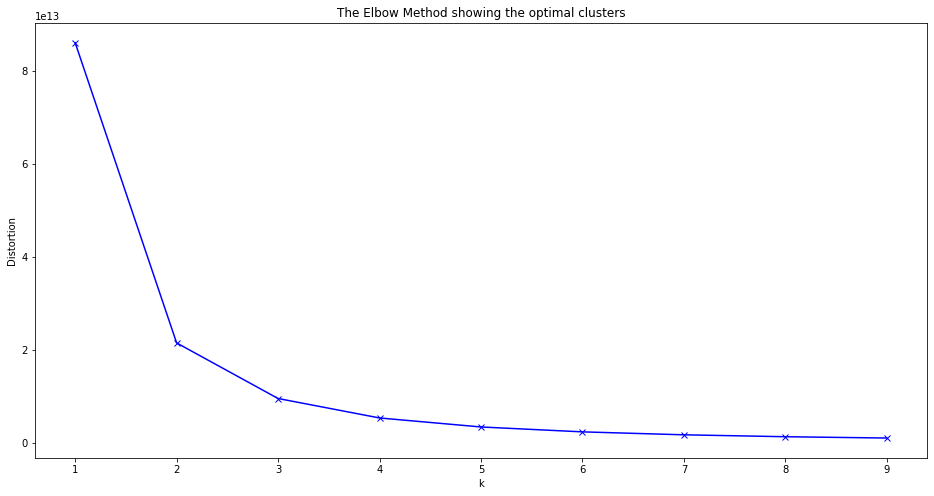

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

Now, the K-means model will predict the dataframe values and fitted them into 4 clusters and assign them to a new column named cluster. 

In [16]:
kmeans_model = KMeans(n_clusters=4, n_jobs=4, random_state=32932)
kmeans_predict = kmeans_model.fit_predict(df1)

In [17]:
df1['cluster'] = kmeans_predict
df1.head()

,userID,index,visitByTheHour,weekOfYear,weekOfYear,dayOfWeek,cluster
0,32,0,11,5,5,4,2
1,140,1,5,1,1,2,2
2,195,2,15,6,6,3,2
3,19,3,22,11,11,2,2
4,84,4,20,1,1,1,2


This dataset is not only ready for K-means clustering, but will also be saved into a csv file to be used to show visit history in later process.

In [18]:
df1.to_csv('visit-history-Q1.csv')

The below cell calculates the magnitude of each persona both in number and in percentage.

In [19]:
cardinality_df = pd.DataFrame(df1['cluster'].value_counts().reset_index())
cardinality_df.rename(columns={
    'index': 'Persona',
    'cluster': 'Magnitude'
}, inplace=True)
cardinality_df['MagnitudeInPercentage'] = cardinality_df['Magnitude'] /cardinality_df['Magnitude'].sum() * 100
cardinality_df['MagnitudeInPercentage'] = np.ceil(cardinality_df['MagnitudeInPercentage'])
cardinality_df

,Persona,Magnitude,MagnitudeInPercentage
0,3,25352,26.0
1,0,25334,26.0
2,1,25233,25.0
3,2,25182,25.0


Now, the cluster will be joined with the original dataframe and cleaned to be ready for clickstream transformation.

In [20]:
df2 = df1.join(df, lsuffix="DROP").filter(regex="^(?!.*DROP)")
df3 = df2[['userID','cluster','timestamp', 'activity_og', 'page']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101101 entries, 0 to 101100
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cluster                  101101 non-null  int32         
 1   index                    101101 non-null  int64         
 2   values                   101101 non-null  object        
 3   userID                   101101 non-null  object        
 4   companyID                101101 non-null  int64         
 5   country                  101101 non-null  object        
 6   timestamp                101101 non-null  object        
 7   year                     101101 non-null  int64         
 8   quarter                  101101 non-null  int64         
 9   month                    101101 non-null  int64         
 10  weekNumber               101101 non-null  int64         
 11  dayNumber                101101 non-null  int64         
 12  page            

In [21]:
df3.to_csv('iteration-2-clickstream-Q1.csv')
df3.to_csv('../../iteration-3/algorithm/iteration-2-clickstream-Q1.csv')

## Persona information
The below graphs will show user behaviour in the platform per personas.

In [22]:
dfP1 = df2[df2['cluster'] == 0]
dfP2 = df2[df2['cluster'] == 1]
dfP3 = df2[df2['cluster'] == 2]
dfP4 = df2[df2['cluster'] == 3]

## Persona 1

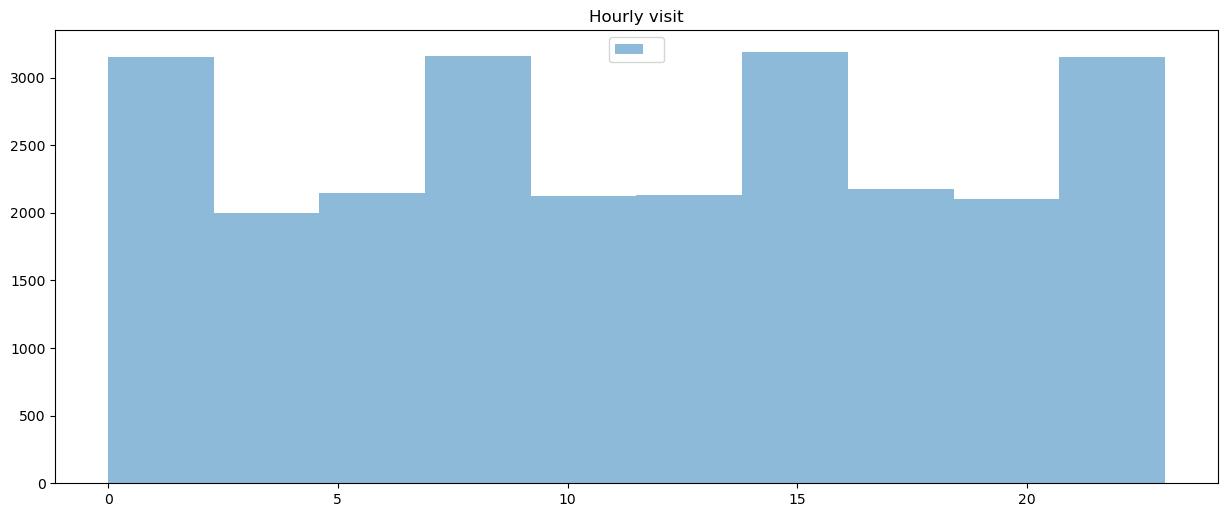

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP1['visitByTheHour']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Hourly visit')
plt.legend();

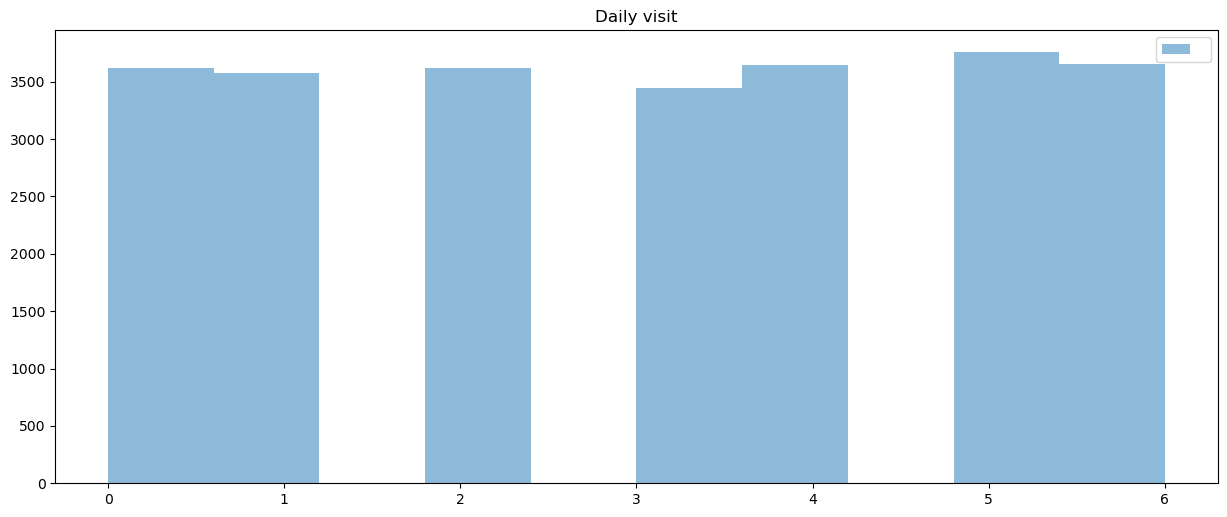

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP1['dayOfWeek']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Daily visit')
plt.legend();

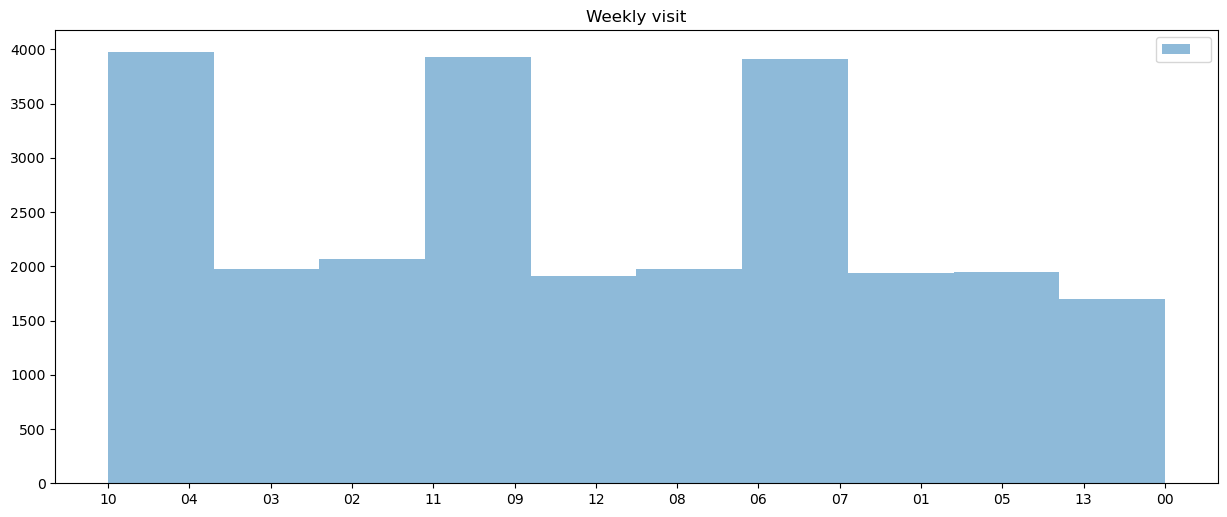

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP1['weekOfYear']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Weekly visit')
plt.legend();

## Persona 2

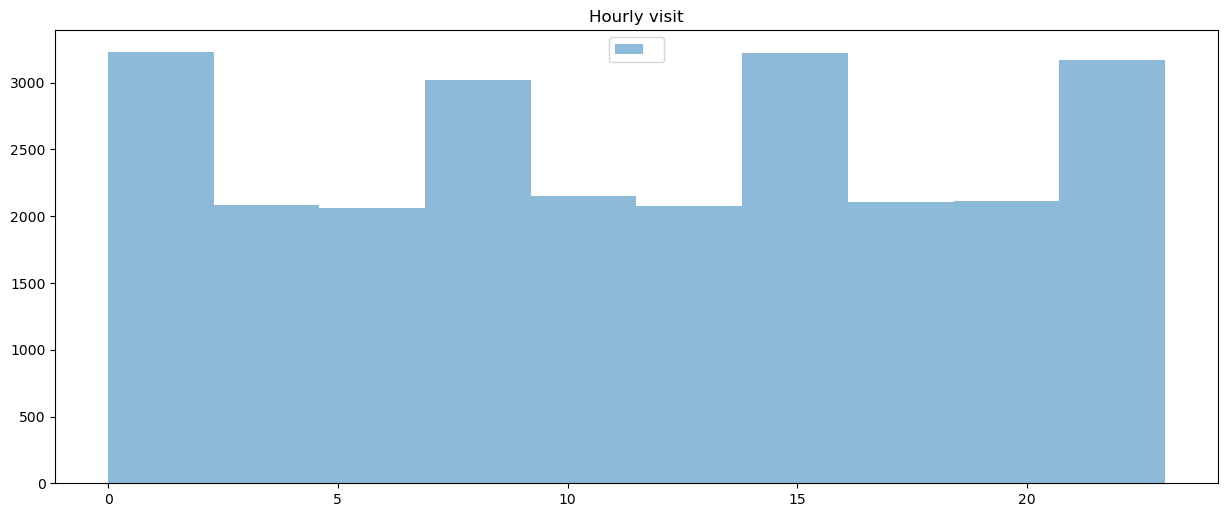

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP2['visitByTheHour']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Hourly visit')
plt.legend();

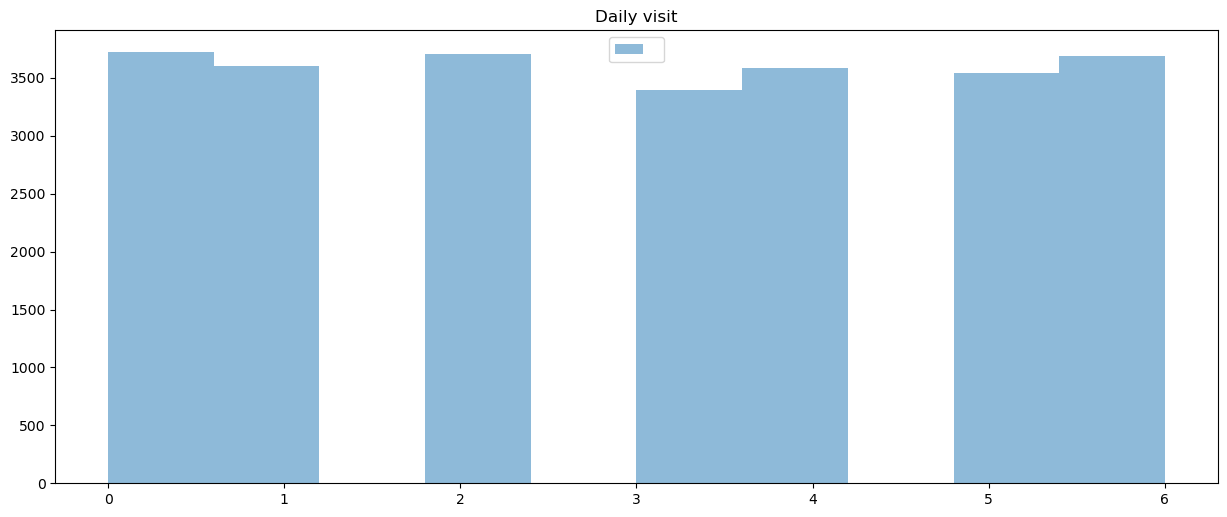

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP2['dayOfWeek']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Daily visit')
plt.legend();

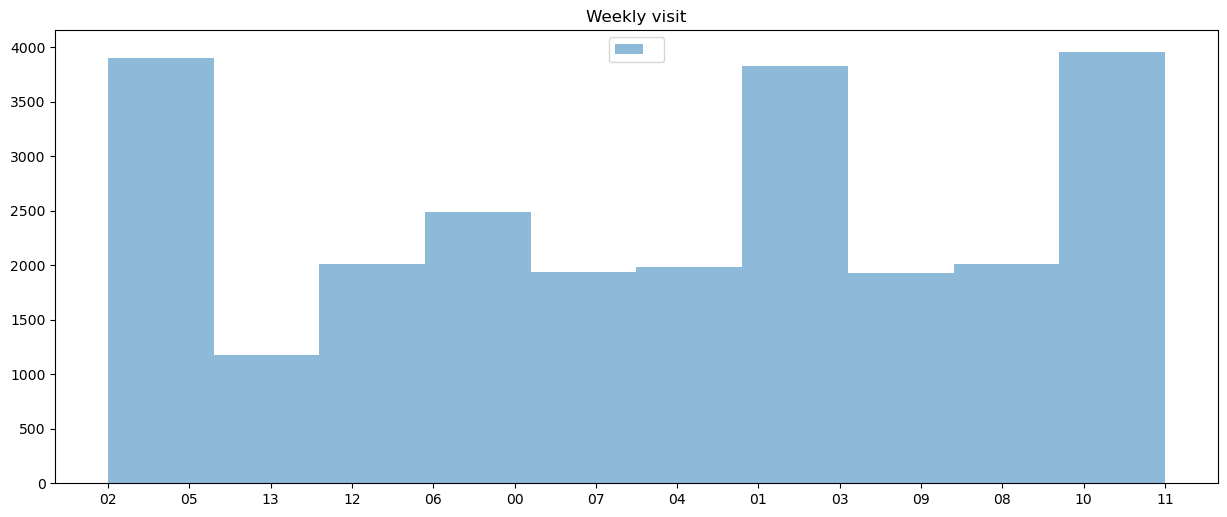

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP2['weekOfYear']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Weekly visit')
plt.legend();

## Persona 3

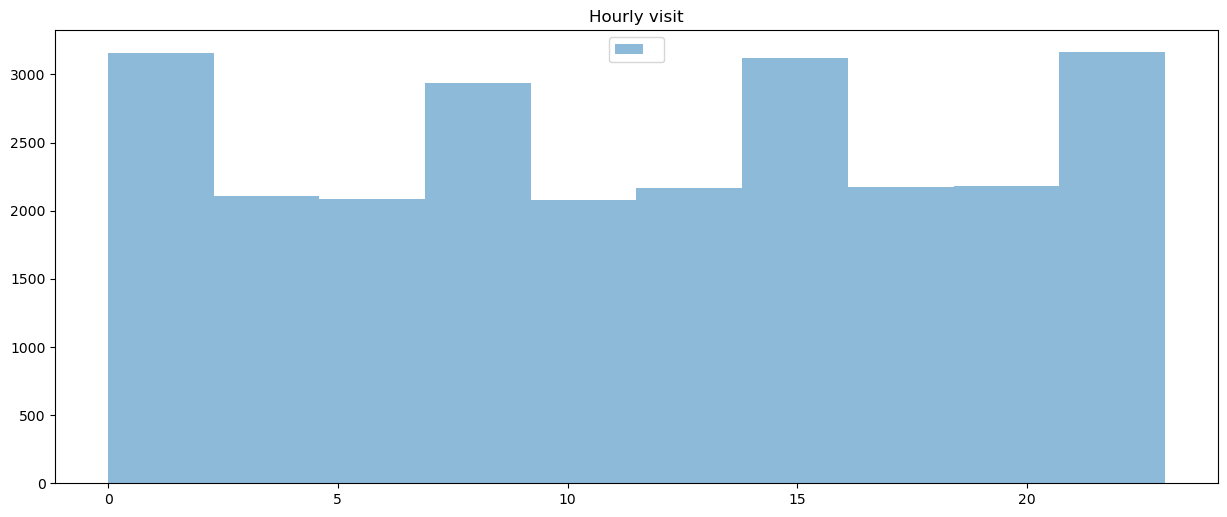

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP3['visitByTheHour']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Hourly visit')
plt.legend();

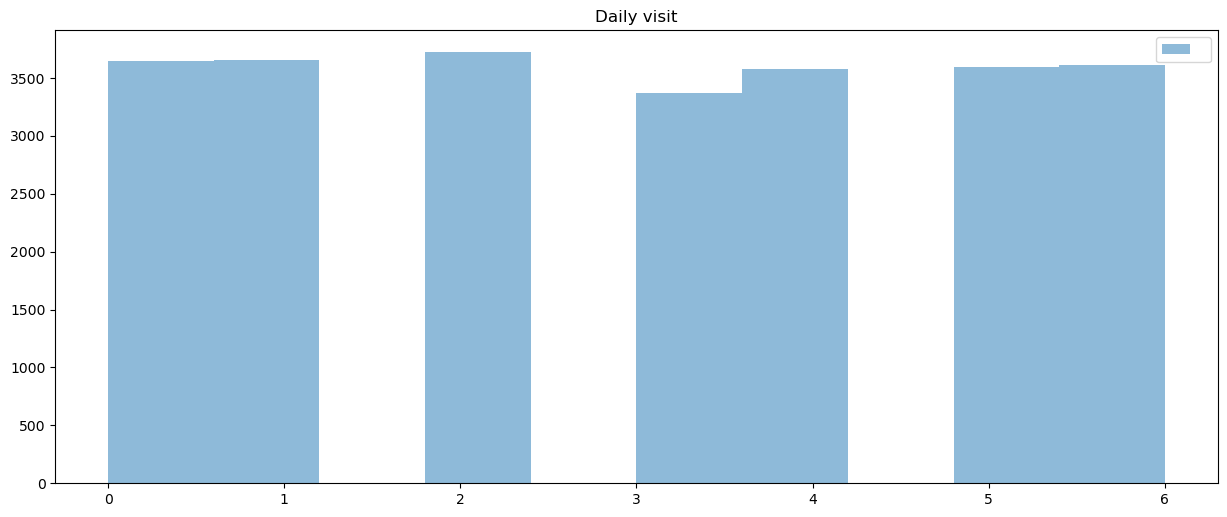

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP3['dayOfWeek']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Daily visit')
plt.legend();

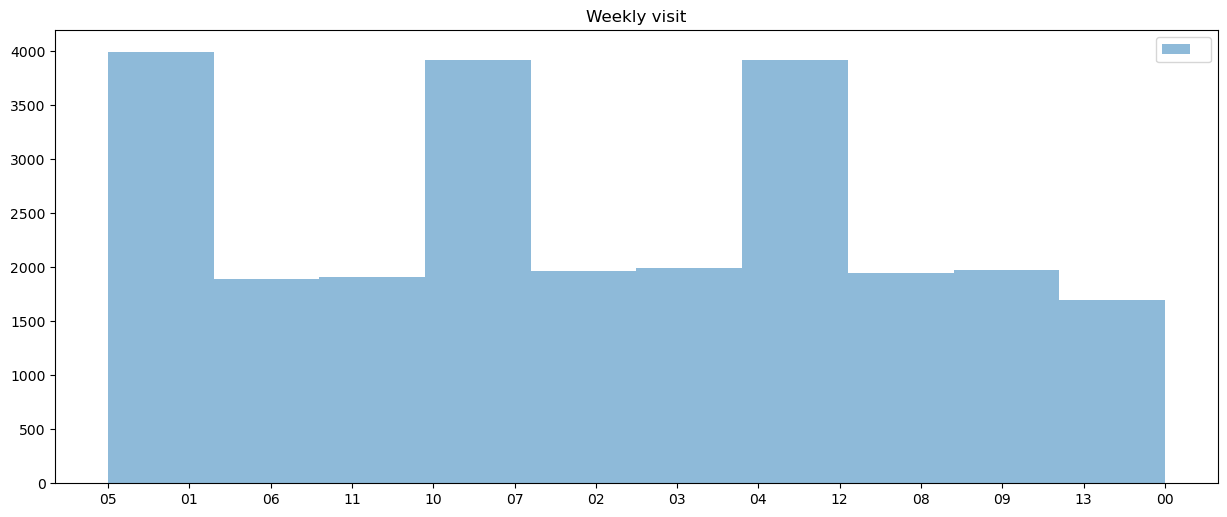

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP3['weekOfYear']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Weekly visit')
plt.legend();

## Persona 4

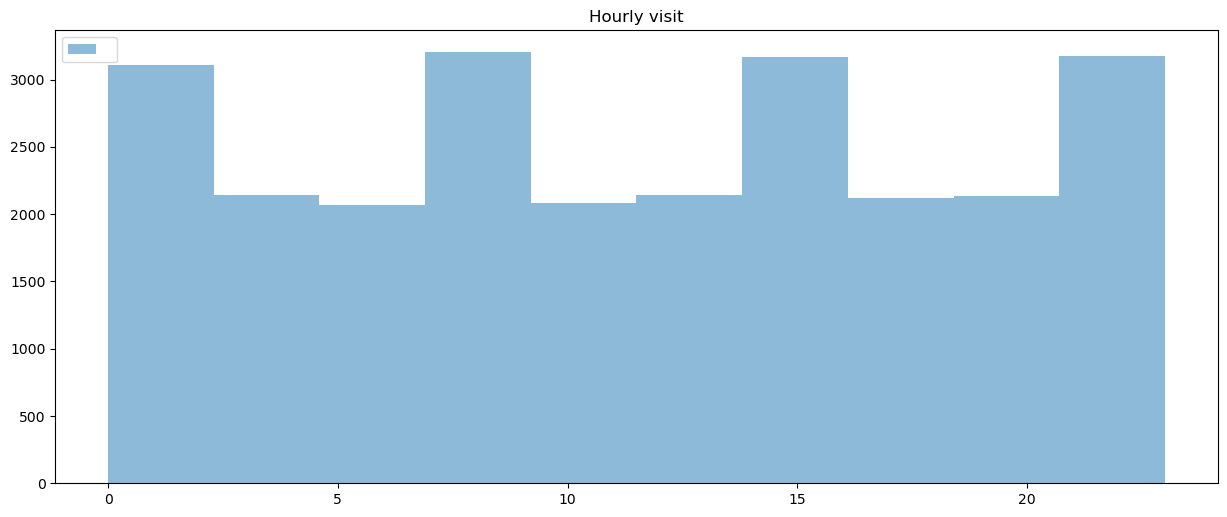

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP4['visitByTheHour']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Hourly visit')
plt.legend();

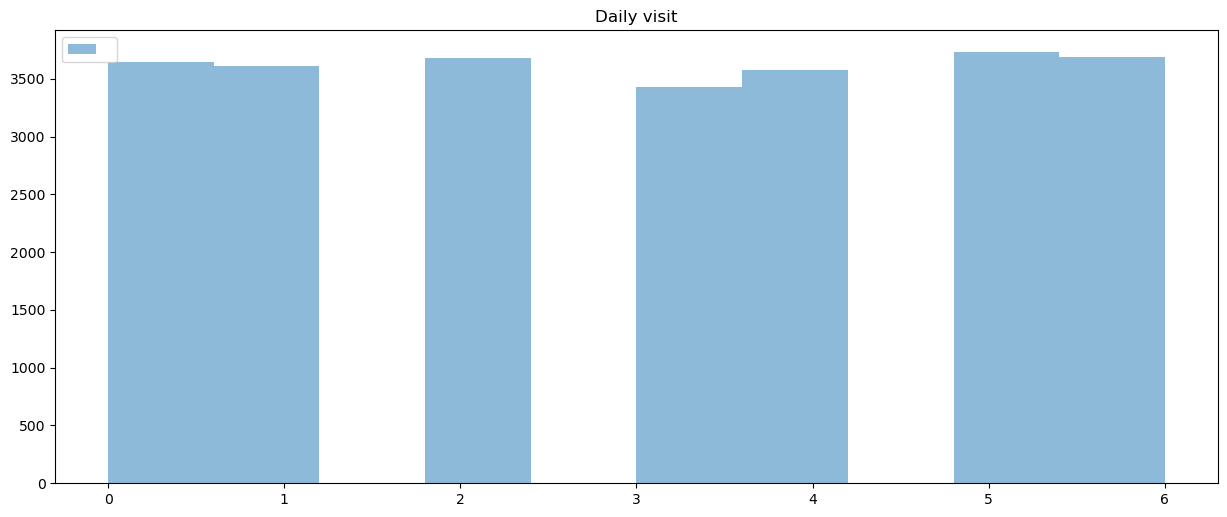

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP4['dayOfWeek']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Daily visit')
plt.legend();

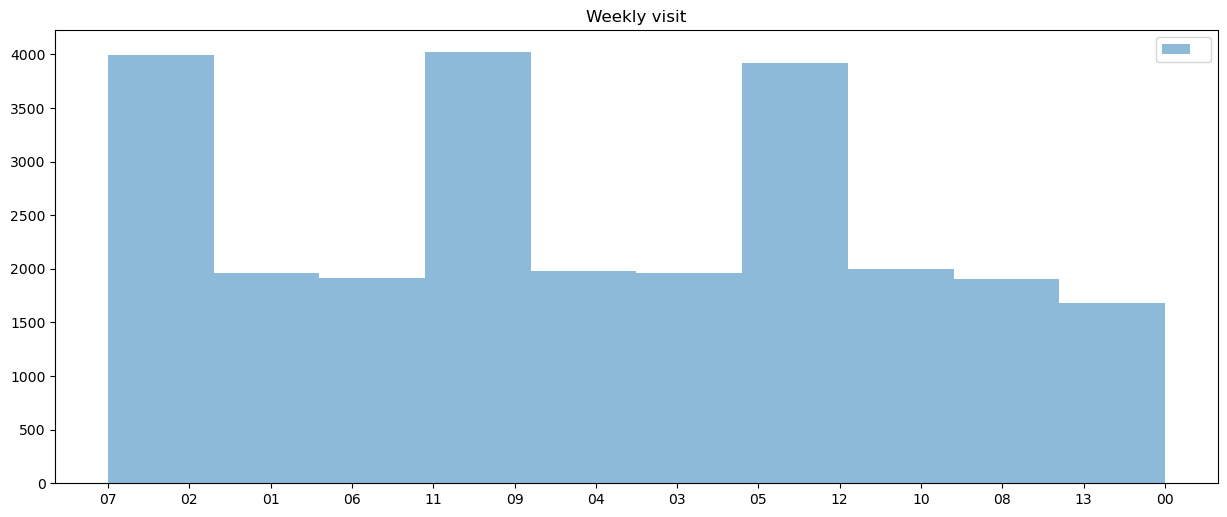

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})

x1 = dfP4['weekOfYear']
kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, label=' ')
plt.gca().set(title='Weekly visit')
plt.legend();